In [3]:
import os

import keras
import numpy as np
import pandas as pd
# from keras.saving import load_model
from bayesflow.adapters import Adapter

# ---------------- Configuration ----------------
PARAM_NAMES = ['v_base', 'a_init', 't_nd', 'leak', 'collapse_rate', 'gamma', 'sigma_cpp', 'sigma_n200']
CHECKPOINT_PATH = './checkpoints_unified_joint/unified_joint_model_final2.keras'
REAL_DATA_CSV = r'D:\python\mtcode\data1EA\behaviour_eeg_ea\sub02_eeg_behavioral_features.csv'

# ---------------- Load and Prepare Real Data ----------------
df = pd.read_csv(REAL_DATA_CSV)
summary_vars = df[['RT', 'Choice_Correct', 'CPP_Slope', 'N200_Latency']].to_numpy(dtype=np.float32)
summary_vars = summary_vars[~np.isnan(summary_vars).any(axis=1)]
summary_vars = summary_vars.reshape(1, *summary_vars.shape)  # [1, n_trials, n_features]

# ---------------- Rebuild Adapter ----------------
adapter = Adapter() \
    .to_array() \
    .convert_dtype('float64', 'float32') \
    .standardize('summary_variables') \
    .keep(['summary_variables'])

# Adapt real data (simulate what would happen in the workflow)
conditions = adapter({'summary_variables': summary_vars})

# ---------------- Load Trained Amortizer ----------------
approximator = keras.saving.load_model(CHECKPOINT_PATH)

# ---------------- Run Inference ----------------
posteriors = approximator.sample(conditions=conditions, num_samples=1000)

# ---------------- Process and Print Results ----------------
posterior_array = np.stack([posteriors[k] for k in PARAM_NAMES], axis=-1)  # [1, 1000, 9]
mean_estimates = posterior_array.mean(axis=1)[0]

# Squeeze the full posterior array to remove singleton dimensions
posterior_array = np.squeeze(posterior_array)           # (1000, 9)
mean_estimates = posterior_array.mean(axis=0)           # (9,)

# Print each parameter estimate
print("\nPosterior Mean Estimates:")
for name, val in zip(PARAM_NAMES, mean_estimates):
    print(f"{name:>15}: {val:.4f}")




D:\myanaconda\envs\TORCHGPU3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 397 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Posterior Mean Estimates:
         v_base: -0.0775
         a_init: 1.5361
           t_nd: 0.2818
           leak: 1.0470
  collapse_rate: 0.2583
          gamma: 0.7246
      sigma_cpp: 5.2458
     sigma_n200: 0.0329


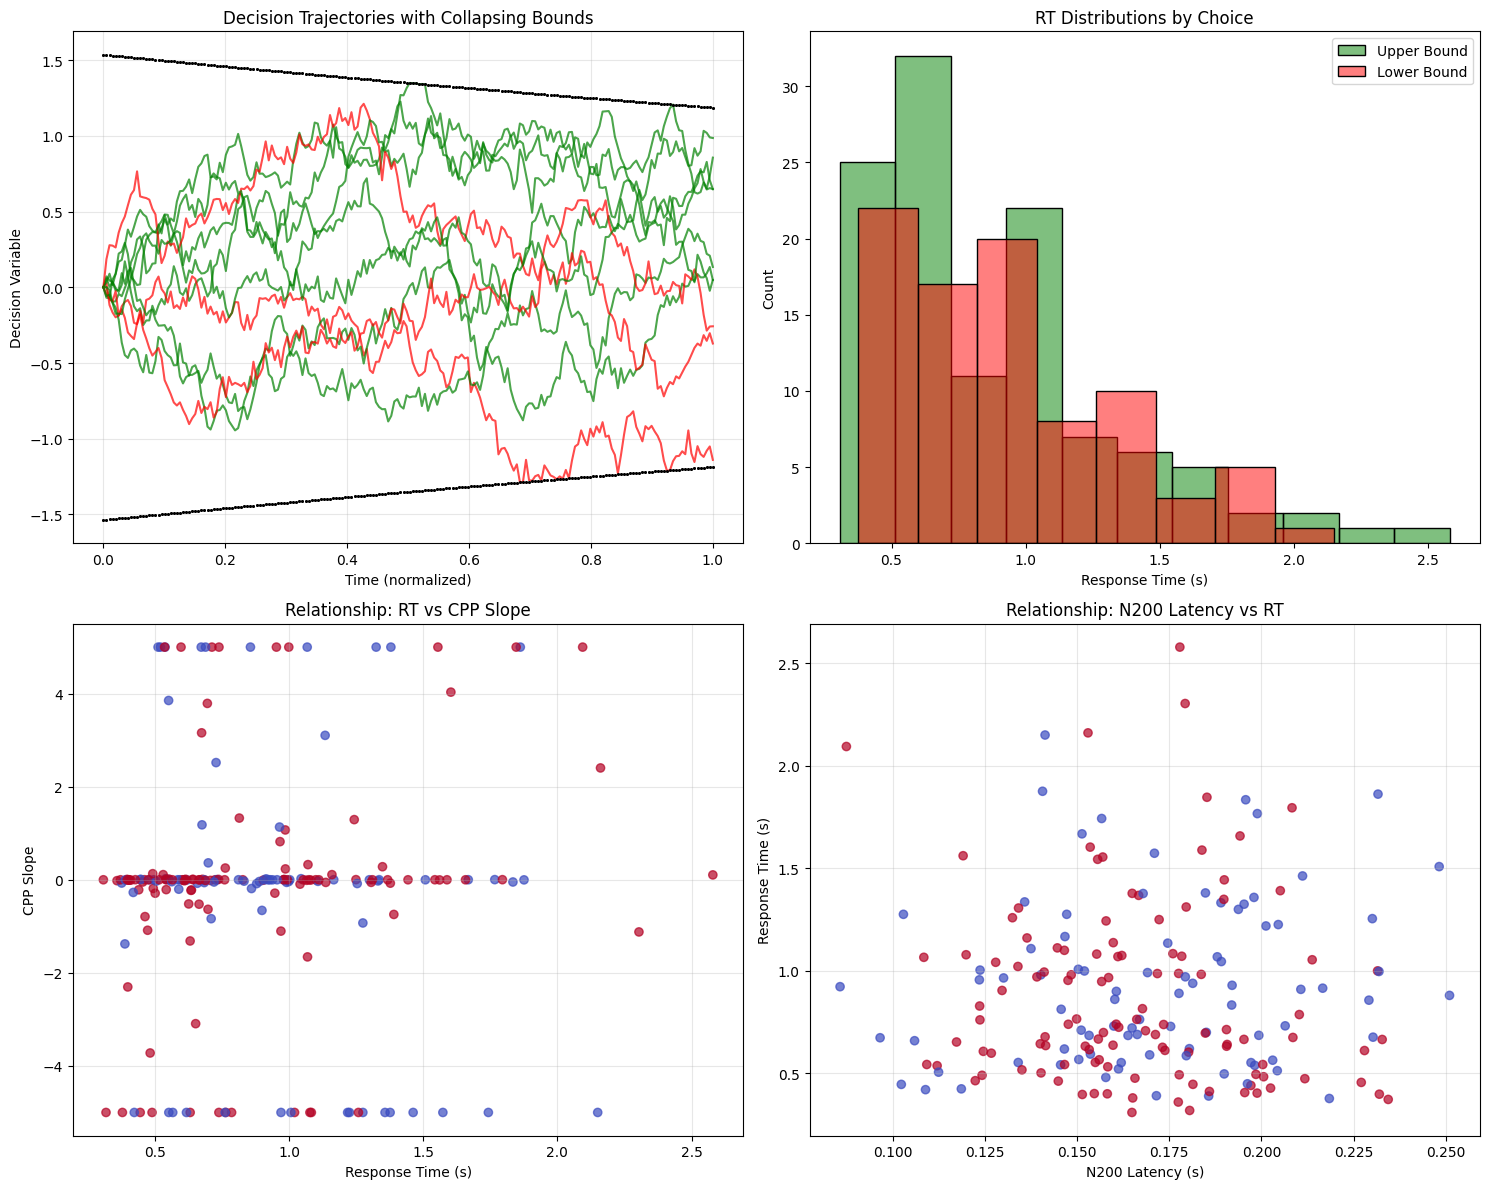

In [4]:
from trial_dynamics_visualization import visualize_trial_dynamics

# ---------------- Visualize Trial-Level Dynamics ----------------
params_dict = dict(zip(PARAM_NAMES, mean_estimates))
visualize_trial_dynamics(params_dict, save_path='trial_dynamics.png')


In [6]:
import os

import keras
import numpy as np
import pandas as pd
# from keras.saving import load_model
from bayesflow.adapters import Adapter

# ---------------- Configuration ----------------
PARAM_NAMES = ['v_base', 'a_init', 't_nd', 'leak', 'collapse_rate', 'gamma', 'sigma_cpp', 'sigma_n200']
CHECKPOINT_PATH = './checkpoints_unified_joint/unified_joint_model_final2.keras'
REAL_DATA_CSV = r'D:\python\mtcode\data2features_combined\sub-04_task-wordchoice_combined.csv'

# ---------------- Load and Prepare Real Data ----------------
df = pd.read_csv(REAL_DATA_CSV)
summary_vars = df[['RT', 'Choice_Correct', 'CPP_Slope', 'N200_Latency']].to_numpy(dtype=np.float32)
summary_vars = summary_vars[~np.isnan(summary_vars).any(axis=1)]
summary_vars = summary_vars.reshape(1, *summary_vars.shape)  # [1, n_trials, n_features]

# ---------------- Rebuild Adapter ----------------
adapter = Adapter() \
    .to_array() \
    .convert_dtype('float64', 'float32') \
    .standardize('summary_variables') \
    .keep(['summary_variables'])

# Adapt real data (simulate what would happen in the workflow)
conditions = adapter({'summary_variables': summary_vars})

# ---------------- Load Trained Amortizer ----------------
approximator = keras.saving.load_model(CHECKPOINT_PATH)

# ---------------- Run Inference ----------------
posteriors = approximator.sample(conditions=conditions, num_samples=1000)

# ---------------- Process and Print Results ----------------
posterior_array = np.stack([posteriors[k] for k in PARAM_NAMES], axis=-1)  # [1, 1000, 9]
mean_estimates = posterior_array.mean(axis=1)[0]

# Squeeze the full posterior array to remove singleton dimensions
posterior_array = np.squeeze(posterior_array)           # (1000, 9)
mean_estimates = posterior_array.mean(axis=0)           # (9,)

# Print each parameter estimate
print("\nPosterior Mean Estimates:")
for name, val in zip(PARAM_NAMES, mean_estimates):
    print(f"{name:>15}: {val:.4f}")




D:\myanaconda\envs\TORCHGPU3\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 1 variables whereas the saved optimizer has 397 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



Posterior Mean Estimates:
         v_base: -0.0949
         a_init: 1.5591
           t_nd: 0.2824
           leak: 1.0563
  collapse_rate: 0.2640
          gamma: 0.6449
      sigma_cpp: 5.2538
     sigma_n200: 0.0321


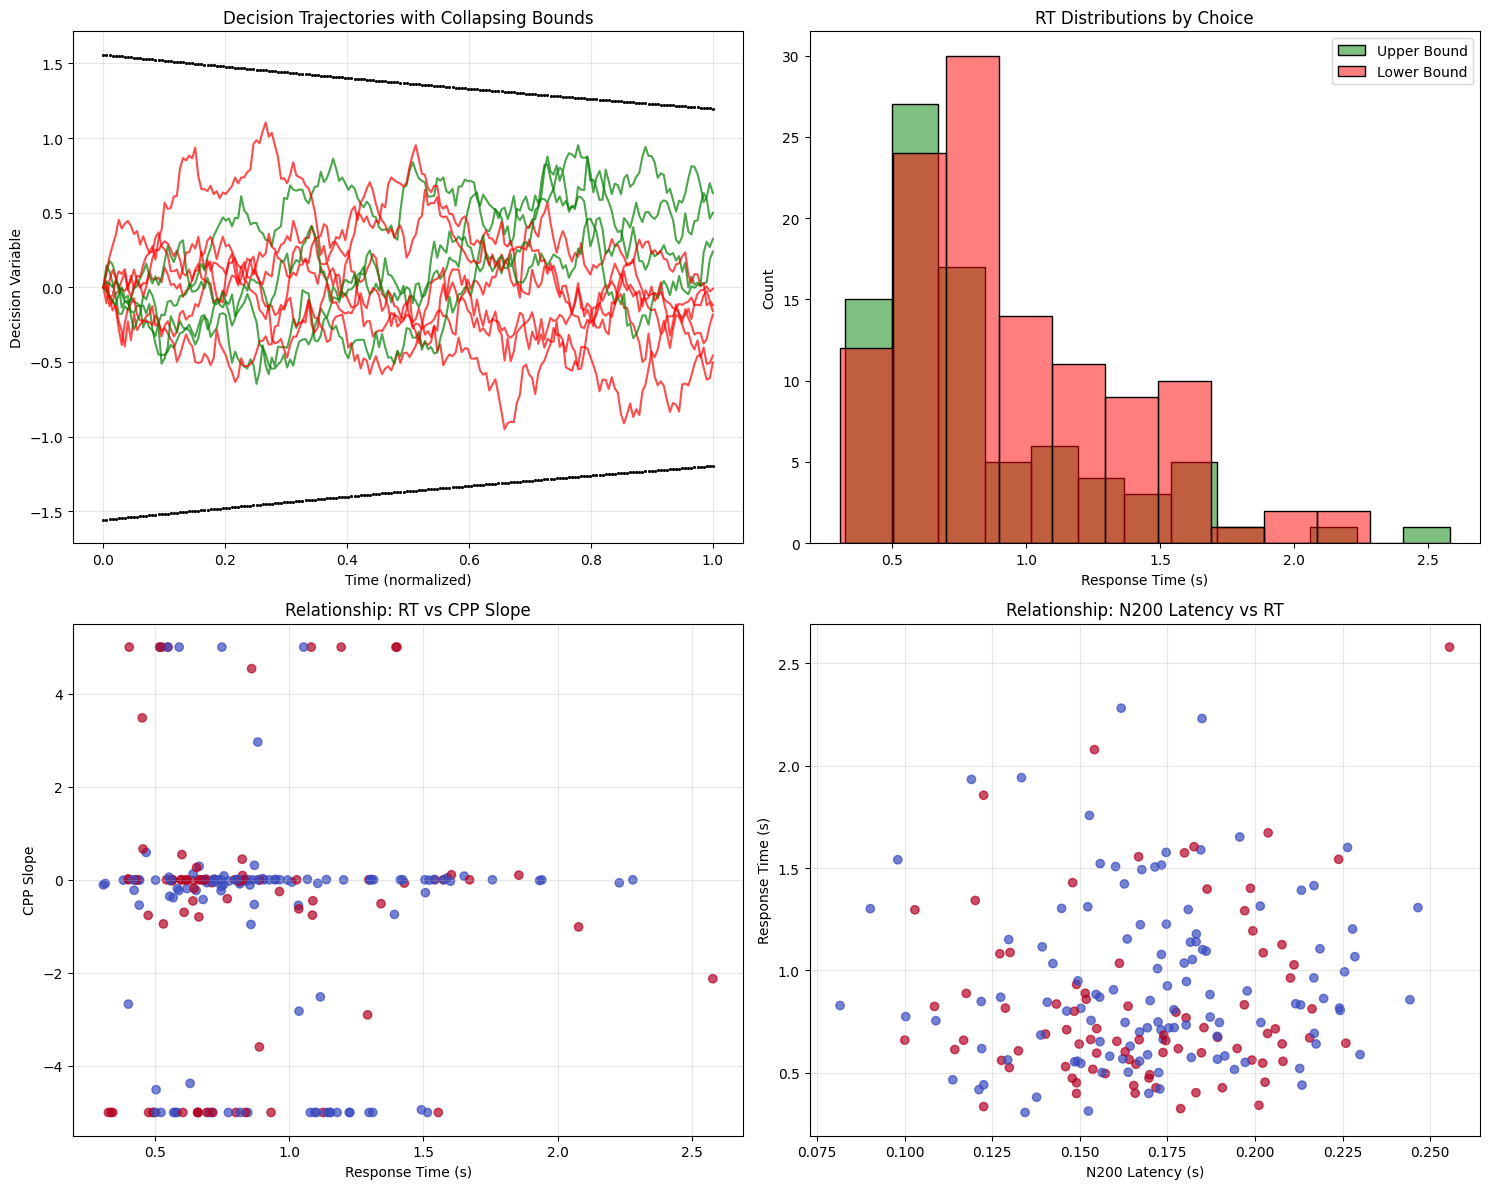

In [7]:
from trial_dynamics_visualization import visualize_trial_dynamics

# ---------------- Visualize Trial-Level Dynamics ----------------
params_dict = dict(zip(PARAM_NAMES, mean_estimates))
visualize_trial_dynamics(params_dict, save_path='trial_dynamics2.png')
